# Import library and dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [28]:
!wget https://gist.githubusercontent.com/kurnivan-ny/9dc82f8ca87d77c5167f2778aa0df997/raw/f1a1f79c341560202846402bdbafe02600e2e683/Iris_unclean.csv

--2023-03-19 11:39:44--  https://gist.githubusercontent.com/kurnivan-ny/9dc82f8ca87d77c5167f2778aa0df997/raw/f1a1f79c341560202846402bdbafe02600e2e683/Iris_unclean.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4613 (4.5K) [text/plain]
Saving to: ‘Iris_unclean.csv.1’

Iris_unclean.csv.1  100%[===================>]   4.50K  --.-KB/s    in 0s      

2023-03-19 11:39:44 (60.5 MB/s) - ‘Iris_unclean.csv.1’ saved [4613/4613]



In [29]:
data = pd.read_csv('Iris_unclean.csv')
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,NaN,3.5,1.4,0.2,Iris-setosa
1,4.9,2000.0,1.4,0.2,Iris-setosa
2,4.7,3.2,-1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,NaN,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,-1.5,0.2,Iris-setosa
8,4.4,1500.0,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Check null data

In [30]:
data.shape

(150, 5)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  148 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
data.isna().sum()

SepalLengthCm    2
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
data = data.dropna()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 1 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  148 non-null    float64
 1   SepalWidthCm   148 non-null    float64
 2   PetalLengthCm  148 non-null    float64
 3   PetalWidthCm   148 non-null    float64
 4   Species        148 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


# Check data stats

In [35]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,148.000000,148.000000,148.000000,148.000000
mean,5.856757,26.657432,3.752703,1.211486
std,0.824964,204.477337,1.834716,0.760194
min,4.300000,2.000000,-1.500000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,2000.000000,6.900000,2.500000


In [36]:
# ada petal length yang nilai minimumnya negaatif

In [37]:
data[data['PetalLengthCm']<0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4.7,3.2,-1.3,0.2,Iris-setosa
7,5.0,3.4,-1.5,0.2,Iris-setosa


In [38]:
data[data['PetalLengthCm']<1].index

Int64Index([2, 7], dtype='int64')

In [39]:
data = data.drop((data[data['PetalLengthCm']<1]).index, axis=0)

In [40]:
data[data['PetalLengthCm']<1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


# Check outliers

<Axes: >

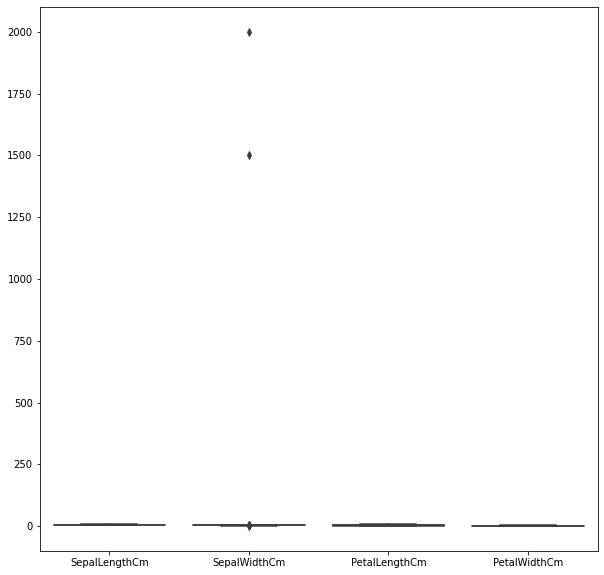

In [45]:
plt.figure(figsize = (10, 10))
sns.boxplot(data=data)

<Axes: >

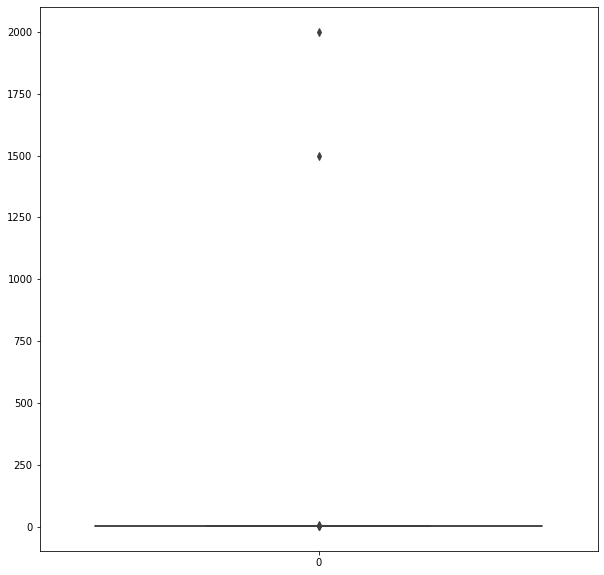

In [49]:
plt.figure(figsize = (10, 10))
sns.boxplot(data=[data['SepalWidthCm']])

In [43]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,146.000000,146.000000,146.000000,146.000000
mean,5.870548,26.977397,3.823288,1.225342
std,0.821871,205.864169,1.743917,0.756016
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.325000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,2000.000000,6.900000,2.500000


In [19]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    IQR = data['SepalWidthCm'].describe()['75%'] - data['SepalWidthCm'].describe()['25%']

    min = Q1-1.5*IQR
    max = Q3+1.5*IQR
    print('min= ', min)
    print('max= ', max) 

    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]


In [20]:
detect_outliers(data,'SepalWidthCm')

min=  2.05
max=  4.05


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,2000.0,1.4,0.2,Iris-setosa
8,4.4,1500.0,1.4,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [21]:
data = data.drop((data[data['SepalWidthCm']<=2]).index, axis=0)
data = data.drop((data[data['SepalWidthCm']>=4.05]).index, axis=0)

<Axes: >

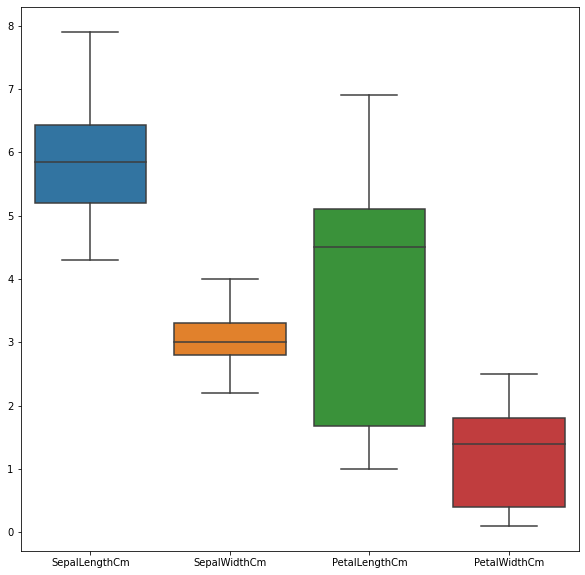

In [22]:
plt.figure(figsize = (10, 10))
sns.boxplot(data=data)

# Visulization

<Axes: >

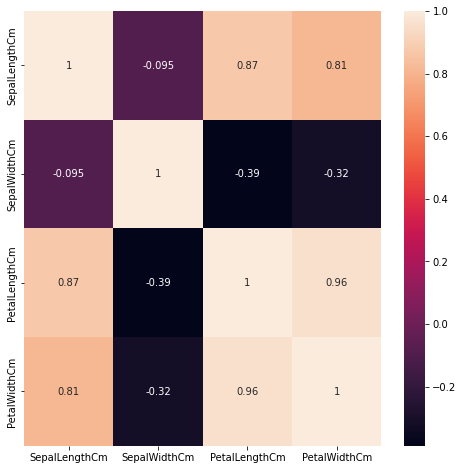

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

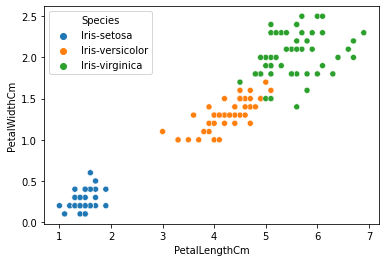

In [24]:
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],data=data,hue='Species')

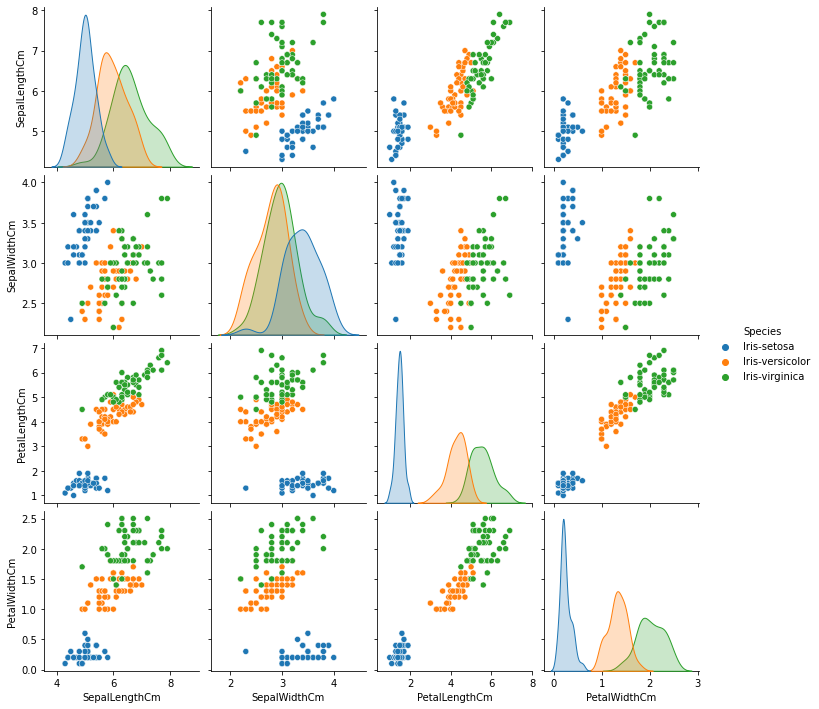

In [25]:
sns.pairplot(data, hue='Species')